In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random

In [51]:
path = "/Users/kang/Dropbox/Code/data/toppcell_test/"

In [74]:
df_bin = pd.read_csv(path + "test_bin_table.txt", sep = "\t", header = 0, index_col = 0).T
df_bin_meta = pd.read_csv(path + "test_bin_meta_table.txt", sep = "\t", header = 0, index_col = 0)
df_DEG = pd.read_csv(path + "DEGs_cell.txt", sep = "\t", header = 0, index_col = 0)

In [53]:
df_bin.shape

(35635, 209)

In [54]:
df_DEG.shape

(285080, 7)

In [55]:
df_bin.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-10,ctrl-B cells-bin-11,ctrl-B cells-bin-12,ctrl-B cells-bin-13,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,...,stim-NK cells-bin-11,stim-NK cells-bin-12,stim-NK cells-bin-2,stim-NK cells-bin-3,stim-NK cells-bin-4,stim-NK cells-bin-5,stim-NK cells-bin-6,stim-NK cells-bin-7,stim-NK cells-bin-8,stim-NK cells-bin-9
MIR1302-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_DEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
CD74,B cells,151.864487,7.343440,0.0,0.0,0.990284,0.526109
HLA-DRA,B cells,130.348312,7.762211,0.0,0.0,0.971240,0.368371
HLA-DRB1,B cells,76.798622,6.471466,0.0,0.0,0.881461,0.337828
CD79A,B cells,73.298073,10.871271,0.0,0.0,0.690245,0.012670
HLA-DPA1,B cells,62.462658,5.916356,0.0,0.0,0.806840,0.295339


In [57]:
np.unique(df_DEG["Status"])

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes',
       'NK cells'], dtype=object)

In [58]:
df_subsetDEG = df_DEG.groupby(["Status"]).head(200)
df_subsetDEG = df_subsetDEG.sort_values(["Status", "pts"], ascending = [True, False])
df_subsetDEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
MALAT1,B cells,16.935381,0.253655,1.905770e-62,1.221441e-60,0.999223,0.997873
RPS2,B cells,41.362907,0.915839,0.000000e+00,0.000000e+00,0.998834,0.979231
RPL13,B cells,44.911869,1.014175,0.000000e+00,0.000000e+00,0.998445,0.975973
RPS19,B cells,45.142956,1.049590,0.000000e+00,0.000000e+00,0.998057,0.971765
RPL13A,B cells,47.070755,1.153605,0.000000e+00,0.000000e+00,0.997668,0.970317


In [76]:
# reorder df_bin
df_bin_meta = df_bin_meta.sort_values(["cell", "stim"])
df_bin = df_bin.loc[:, list(df_bin_meta.index.values)]

In [77]:
df_heatmap.to_csv(path + "heatmap.txt", sep = "\t")
df_heatmap.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,ctrl-B cells-bin-6,ctrl-B cells-bin-7,ctrl-B cells-bin-8,ctrl-B cells-bin-9,...,stim-NK cells-bin-3,stim-NK cells-bin-4,stim-NK cells-bin-5,stim-NK cells-bin-6,stim-NK cells-bin-7,stim-NK cells-bin-8,stim-NK cells-bin-9,stim-NK cells-bin-10,stim-NK cells-bin-11,stim-NK cells-bin-12
MALAT1,15.434958,15.744554,15.907294,16.021366,16.102377,16.054108,16.076878,16.105022,16.147181,16.265970,...,16.161806,16.232668,16.200256,16.262424,16.287071,16.352869,16.331924,16.408272,16.428579,16.431232
RPS2,13.229801,13.360685,13.514139,13.575963,13.568206,13.446855,13.594203,13.540476,13.461397,13.460825,...,11.578118,11.449128,11.849529,10.920788,11.454806,10.768597,10.706498,11.431891,11.318838,10.668846
RPL13,12.910189,13.152624,13.340174,13.385347,13.391960,13.408374,13.446860,13.337586,13.349913,13.441875,...,11.283188,11.698208,11.298018,11.584160,11.320724,11.378019,11.133749,11.581010,10.621077,10.456909
RPS19,12.717336,12.775962,12.818413,13.057341,13.170571,13.042192,13.217729,13.142006,13.167576,13.188867,...,11.802504,11.791945,11.571882,11.364098,11.448328,11.575607,11.882621,11.519570,11.160199,10.982304
RPL13A,12.906629,12.982512,13.328936,13.260606,13.397074,13.296496,13.445388,13.425272,13.187662,13.381186,...,10.999023,10.905376,11.019019,11.362285,11.071683,10.821525,11.151191,10.780089,10.393428,10.160810


Text(50.0, 0.5, 'gene modules')

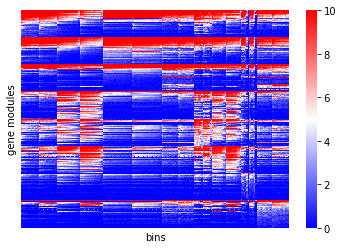

In [117]:
fig, ax = plt.subplots()
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, cmap = "bwr", ax = ax)
ax.set_xlabel("bins")
ax.set_ylabel("gene modules")

#### load shred output

In [3]:
path = "/Users/jinmr2/Dropbox/Code/data/toppcell_test/"
df_heatmap = pd.read_csv(path + "heatmap_matrix.txt", sep = "\t", header = 0, index_col = 0)

In [4]:
df_heatmap.shape

(5200, 994)

Text(50.0, 0.5, 'gene modules')

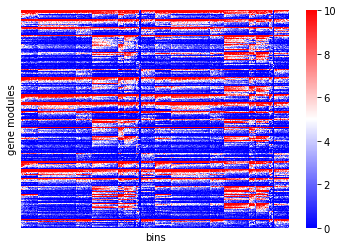

In [5]:
fig, ax = plt.subplots()
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, cmap = "bwr", ax = ax)
ax.set_xlabel("bins")
ax.set_ylabel("gene modules")

In [6]:
df_heatmap.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,ctrl-B cells-bin-6,ctrl-B cells-bin-7,ctrl-B cells-bin-8,ctrl-B cells-bin-9,...,stim-NK cells-bin-47,stim-NK cells-bin-48,stim-NK cells-bin-49,stim-NK cells-bin-50,stim-NK cells-bin-51,stim-NK cells-bin-52,stim-NK cells-bin-53,stim-NK cells-bin-54,stim-NK cells-bin-55,stim-NK cells-bin-56
names,,,,,,,,,,,,,,,,,,,,,
MALAT1,15.243845,15.549600,15.177372,15.494718,15.924224,15.630989,15.555499,15.819240,15.892920,15.771133,...,16.378929,16.476194,16.274712,16.394564,16.552271,16.522205,16.599457,16.250437,16.583708,16.230389
RPS2,13.057251,13.318465,13.357325,13.133443,13.238771,13.276686,13.297025,13.489362,13.520915,13.562415,...,11.492401,10.655921,11.276680,12.259584,11.169847,10.884022,10.183993,9.962560,12.455915,10.124945
RPL13,12.819453,12.960135,12.871999,12.918115,12.992831,13.077511,13.262815,13.152974,13.193178,13.470922,...,11.852070,10.963547,11.385922,10.681435,10.813249,10.015643,10.098602,10.284519,10.245908,10.387077
RPS19,12.536042,12.744226,12.822029,12.725644,12.749463,12.830173,12.717999,12.889393,12.718104,12.961156,...,11.953522,11.206493,9.688806,11.882328,11.842828,10.990659,11.533920,10.671994,11.403638,10.563638
RPL13A,12.743039,12.982906,13.051197,12.902918,12.800907,13.062754,12.953205,12.994350,13.032144,13.371136,...,10.939131,9.692326,11.210670,10.658924,9.366014,11.153981,10.593846,9.505539,11.366567,8.968153


In [14]:
counts = np.random.normal(100,20,994)
counts

array([ 45.75747526,  90.53378387,  76.16189349,  91.3938719 ,
        72.11501894, 119.99001169, 105.48072924,  96.16105467,
        91.67417851,  78.32307594, 110.72617338,  86.57489535,
        92.33407021, 107.31988186,  96.4523862 , 117.20895032,
        88.64012605,  93.48015641, 105.41855254,  95.72597406,
       111.07826509, 103.21213534, 110.92461906, 111.71372896,
        85.04792963,  81.91429262,  92.01149904, 102.52866674,
        89.05563742, 122.26082579,  69.68394545,  89.24427103,
       128.89391653, 109.12296181, 113.09348856,  99.06139694,
        98.12749956, 106.76686714, 100.97351448,  87.26155155,
       104.60104542,  91.80020296,  67.08990355, 104.20106796,
       117.1335467 ,  92.17344786,  94.81590572,  98.06657469,
       105.67003738,  71.07639334, 109.73540955,  95.02208744,
        89.695378  ,  55.71949934, 107.99644075,  88.3261469 ,
       116.74741775, 108.16567443,  89.70424742, 101.19855731,
       129.7228957 ,  69.12512808, 103.21359621, 101.41

In [20]:
?ax.bar

<BarContainer object of 994 artists>

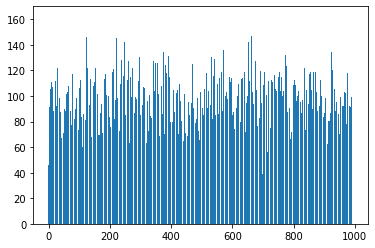

In [21]:
fig, ax = plt.subplots()
ax.bar(x = list(range(994)), height = counts)

In [29]:
?sns.heatmap

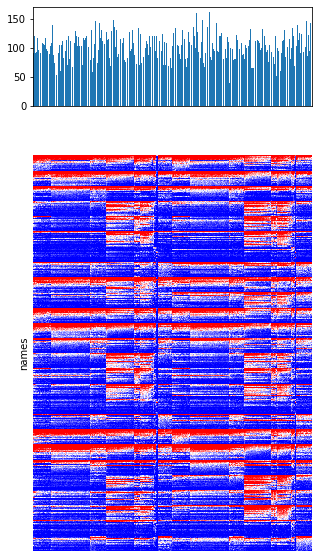

In [33]:
fig = plt.figure(figsize = (5,10))
gs = GridSpec(nrows = 2, ncols = 1, height_ratios=(0.2, 0.8))

ax0 = fig.add_subplot(gs[0,0])
ax0.bar(x = list(range(994)), height = counts)
ax0.set_xticklabels("")
ax0.set_xticks([])
ax0.set_xlim(0,994)

ax1 = fig.add_subplot(gs[1,0])
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, cmap = "bwr", ax = ax1, cbar = False)

plt.show()